In [61]:
import pickle
import numpy as np
from stable_baselines3 import TD3, SAC, DQN
from collections import defaultdict
from envs.aquaculture_env import AquacultureEnv
from envs.dqn_discrete_env import DiscretizedAquacultureEnv
from agent.dyna_q import DiscretizedDynaQAgent
from utils.calculation import Calculation

EPISODE_PER_EVALUATION = 30

def create_env(region):
    return AquacultureEnv(region=region)

def load_dynaq(env, path):
    agent = DiscretizedDynaQAgent(env=env, alpha=0.0809, gamma=0.8954,
                                   planning_steps=6, replay_freq=5,
                                   obs_bins=15, exploration_final_eps=0.001)
    with open(path, "rb") as f:
        q_table_loaded = pickle.load(f)
    agent.q_table = defaultdict(lambda: np.zeros(len(agent.action_space)), q_table_loaded)
    return agent

def load_models_for_env(region):
    models = []

    # --- TD3 on the continuous env ---
    td3_env = AquacultureEnv(region=region)
    td3 = TD3.load("saved_model/td3_best_model.zip", env=td3_env)
    models.append({
        "name":   "TD3",
        "model":  td3,
        "env":    td3_env,
        "region": region
    })

    # --- SAC on the continuous env ---
    sac_env = AquacultureEnv(region=region)
    sac = SAC.load("saved_model/sac_best_model.zip", env=sac_env)
    models.append({
        "name":   "SAC",
        "model":  sac,
        "env":    sac_env,
        "region": region
    })

    # --- DQN on the *discretized* env ---
    dqn_env = DiscretizedAquacultureEnv(region=region)
    dqn = DQN.load("saved_model/dqn_best_model.zip", env=dqn_env)
    models.append({
        "name":   "DQN",
        "model":  dqn,
        "env":    dqn_env,
        "region": region
    })

    # --- Dyna-Q on the continuous env ---
    dynaq_env = AquacultureEnv(region=region)
    dynaq = load_dynaq(dynaq_env, "saved_model/dynaq_best_model.pkl")
    models.append({
        "name":   "Dyna-Q",
        "model":  dynaq,
        "env":    dynaq_env,
        "region": region
    })

    return models

models_easy = load_models_for_env("kafr_el_sheikh")
models_medium = load_models_for_env("north_sulawesi")
models_hard = load_models_for_env("guangdong")

print("✅ All models loaded for easy, medium, and hard environments.")


Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
✅ All models loaded for easy, medium, and hard environments.


In [62]:
from rich.console import Console
from rich.table import Table

console = Console()

def print_model_table(models, difficulty_label):
    table = Table(title=f"[bold cyan]{difficulty_label} Environment Models[/]", title_style="bold underline")

    table.add_column("Model Name", style="bright_yellow", justify="left")
    table.add_column("Region", style="bright_green", justify="left")
    table.add_column("Env Type", style="bright_magenta", justify="left")

    for entry in models:
        table.add_row(
            entry["name"],
            entry["region"],
            type(entry["env"]).__name__
        )
    console.print(table)

print_model_table(models_easy, "Easy")
print_model_table(models_medium, "Medium")
print_model_table(models_hard, "Hard")

                  Easy Environment Models                  
┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Model Name ┃ Region         ┃ Env Type                  ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ TD3        │ kafr_el_sheikh │ AquacultureEnv            │
│ SAC        │ kafr_el_sheikh │ AquacultureEnv            │
│ DQN        │ kafr_el_sheikh │ DiscretizedAquacultureEnv │
│ Dyna-Q     │ kafr_el_sheikh │ AquacultureEnv            │
└────────────┴────────────────┴───────────────────────────┘

                 Medium Environment Models                 
┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Model Name ┃ Region         ┃ Env Type                  ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ TD3        │ north_sulawesi │ AquacultureEnv            │
│ SAC        │ north_sulawesi │ AquacultureEnv            │
│ DQN        │ north_sulawesi │ DiscretizedAquacultureEnv │
│ Dyna-Q     │ north_sulawesi │ AquacultureEnv            │
└────────────┴────────────────┴───────────────────────────┘

               Hard Environment Models                
┏━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Model Name ┃ Region    ┃ Env Type                  ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ TD3        │ guangdong │ AquacultureEnv            │
│ SAC        │ guangdong │ AquacultureEnv            │
│ DQN        │ guangdong │ DiscretizedAquacultureEnv │
│ Dyna-Q     │ guangdong │ AquacultureEnv            │
└────────────┴───────────┴───────────────────────────┘

In [63]:
import numpy as np
from utils.calculation import Calculation

metrics_by_model_easy = {}

for entry in models_easy:
    name  = entry["name"]
    agent = entry["model"]
    env   = entry["env"]

    reward_list = []
    fcr_list    = []
    sgr_list    = []
    pm_list     = []
    energy_efficiency_list = []  # To store energy efficiency values

    for run in range(EPISODE_PER_EVALUATION):
        obs, _ = env.reset()
        initial_biomass = env.prev_biomass

        terminated = False
        truncated  = False
        total_reward     = 0.0
        total_feed_grams = 0.0
        fish_values      = []
        total_costs      = []  # This will store dictionaries with individual costs

        if name == "Dyna-Q":
            state = agent.discretize_obs(obs)

        while not (terminated or truncated):
            if name == "Dyna-Q":
                idx    = np.argmax(agent.q_table[state])
                action = np.array(agent.action_space[idx], dtype=np.float32)
            else:
                action, _ = agent.predict(obs, deterministic=True)

            obs, reward, terminated, truncated, info = env.step(action)
            total_reward     += reward
            total_feed_grams += env.feed_today

            fish_values.append(info["fish_value"])

            # Store individual costs as dictionaries instead of scalar sums
            total_costs.append({
                "feed_cost": info["feed_cost"],
                "heat_cost": info["heat_cost"],
                "oxygenation_cost": info["oxygenation_cost"]
            })

            if name == "Dyna-Q":
                state = agent.discretize_obs(obs)

        # At the end of the episode, calculate final metrics
        final_biomass = env._compute_total_biomass()

        # Calculate metrics after episode ends
        fcr     = Calculation.compute_fcr(total_feed_grams, final_biomass, initial_biomass)
        sgr     = Calculation.compute_sgr(initial_biomass, final_biomass)
        
        # Calculate profit margin, passing the total costs (sum of individual components)
        pmargin = Calculation.compute_profit_margin(fish_values, [sum(cost.values()) for cost in total_costs])

        # Calculate Energy Efficiency after episode ends
        energy_efficiency = Calculation.compute_energy_efficiency(
            sum(fish_values),  # Use the total fish value gain for the episode
            sum([cost["heat_cost"] for cost in total_costs]),  # Total heat cost over the episode
            sum([cost["oxygenation_cost"] for cost in total_costs])  # Total oxygenation cost over the episode
        )

        reward_list.append(total_reward)
        if fcr     is not None: fcr_list.append(fcr)
        if sgr     is not None: sgr_list.append(sgr)
        if pmargin is not None: pm_list.append(pmargin)
        if energy_efficiency is not None: energy_efficiency_list.append(energy_efficiency)

    # Compute means after all runs for the model
    mean_reward = np.mean(reward_list)
    mean_fcr    = np.mean(fcr_list)
    mean_sgr    = np.mean(sgr_list)
    mean_pm     = np.mean(pm_list)
    mean_energy_efficiency = np.mean(energy_efficiency_list)

    metrics_by_model_easy[name] = {
        "mean_reward": mean_reward,
        "mean_fcr":    mean_fcr,
        "mean_sgr":    mean_sgr,
        "mean_energy_efficiency": mean_energy_efficiency,
        "mean_profit_margin": mean_pm,
    }

    # Print summary for each model
    print(f"\n--- Evaluation for {name} (easy: {env.region}) ---")
    print(f"Mean Total Reward:                {mean_reward:.2f}")
    print(f"Mean Feed Conversion Ratio (FCR): {mean_fcr:.2f}")
    print(f"Mean Specific Growth Rate (SGR):  {mean_sgr:.2f}%")
    print(f"Mean Energy Efficiency:           {mean_energy_efficiency:.2f}")
    print(f"Mean Profit Margin:               {mean_pm:.2f}%")


--- Evaluation for TD3 (easy: kafr_el_sheikh) ---
Mean Total Reward:                160.79
Mean Feed Conversion Ratio (FCR): 3.41
Mean Specific Growth Rate (SGR):  2.04%
Mean Energy Efficiency:           3.94
Mean Profit Margin:               49.82%

--- Evaluation for SAC (easy: kafr_el_sheikh) ---
Mean Total Reward:                233.92
Mean Feed Conversion Ratio (FCR): 2.83
Mean Specific Growth Rate (SGR):  2.16%
Mean Energy Efficiency:           4.43
Mean Profit Margin:               56.82%

--- Evaluation for DQN (easy: kafr_el_sheikh) ---
Mean Total Reward:                95.71
Mean Feed Conversion Ratio (FCR): 2.43
Mean Specific Growth Rate (SGR):  1.79%
Mean Energy Efficiency:           2.69
Mean Profit Margin:               45.11%

--- Evaluation for Dyna-Q (easy: kafr_el_sheikh) ---
Mean Total Reward:                197.35
Mean Feed Conversion Ratio (FCR): 2.96
Mean Specific Growth Rate (SGR):  2.10%
Mean Energy Efficiency:           4.08
Mean Profit Margin:               5

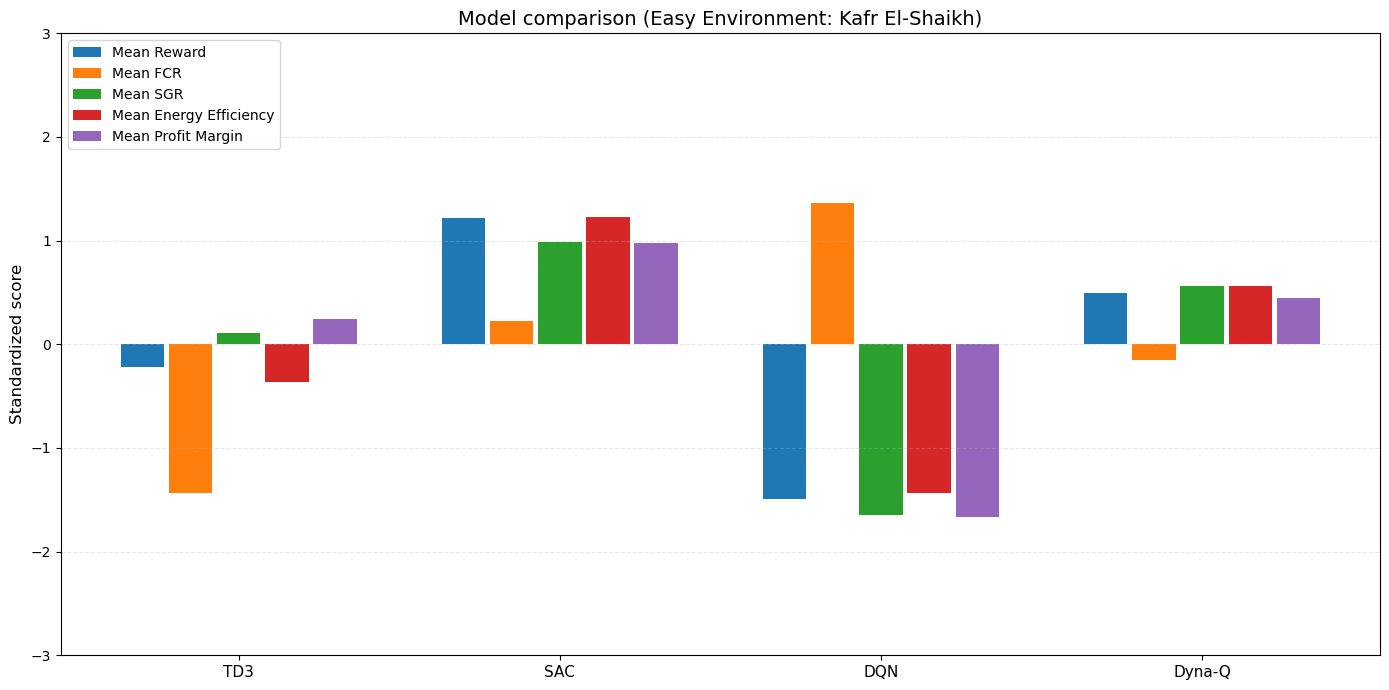

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Extract model names and metric values ---
models = list(metrics_by_model_easy.keys())
metrics = ['mean_reward', 'mean_fcr', 'mean_sgr', 'mean_profit_margin', 'mean_energy_efficiency']
labels = ['Mean Reward', 'Mean FCR', 'Mean SGR', 'Mean Energy Efficiency', 'Mean Profit Margin']

# Build a 2D list: one row per model, one column per metric
values = np.array([[metrics_by_model_easy[m][metric] for metric in metrics]
                  for m in models])

# --- 2. Standardize metrics (Z-score normalization) ---
means = values.mean(axis=0)
std_devs = values.std(axis=0)

# Avoid division by zero by setting very small std_dev values to 1
std_devs[std_devs == 0] = 1

standardized_values = (values - means) / std_devs
plot_vals = standardized_values  # use standardized values

# --- 3. Invert FCR (column 1) because lower is better ---
plot_vals[:, 1] = -plot_vals[:, 1]  # Invert FCR

# --- 4. Plot grouped bar chart with margins ---
fig, ax = plt.subplots(figsize=(14, 7))

# Set the width of a bar and the spacing between groups
width = 0.15
x = np.arange(len(models))  # positions for the groups

# Plot bars for each metric
for i, label in enumerate(labels):
    # Position bars within each group - center the group of bars
    offset = (i - len(metrics)/2 + 0.5) * width
    bars = ax.bar(x + offset, plot_vals[:, i], width * 0.9, label=label)

# --- 5. Labels, ticks, legend ---
ax.set_ylabel('Standardized score', fontsize=12)
ax.set_title('Model comparison (Easy Environment: Kafr El-Shaikh)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=11)
ax.set_ylim(-3, 3)  # Set y-axis limits for standardized values (typically within [-3, 3])
ax.legend(loc='upper left', fontsize=10)

# Add grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [65]:
import numpy as np
from utils.calculation import Calculation

metrics_by_model_medium = {}

for entry in models_medium:
    name  = entry["name"]
    agent = entry["model"]
    env   = entry["env"]

    reward_list = []
    fcr_list    = []
    sgr_list    = []
    pm_list     = []
    energy_efficiency_list = []  # To store energy efficiency values

    for run in range(EPISODE_PER_EVALUATION):
        obs, _ = env.reset()
        initial_biomass = env.prev_biomass

        terminated = False
        truncated  = False
        total_reward     = 0.0
        total_feed_grams = 0.0
        fish_values      = []
        total_costs      = []  # This will store dictionaries with individual costs

        if name == "Dyna-Q":
            state = agent.discretize_obs(obs)

        while not (terminated or truncated):
            if name == "Dyna-Q":
                idx    = np.argmax(agent.q_table[state])
                action = np.array(agent.action_space[idx], dtype=np.float32)
            else:
                action, _ = agent.predict(obs, deterministic=True)

            obs, reward, terminated, truncated, info = env.step(action)
            total_reward     += reward
            total_feed_grams += env.feed_today

            fish_values.append(info["fish_value"])

            # Store individual costs as dictionaries instead of scalar sums
            total_costs.append({
                "feed_cost": info["feed_cost"],
                "heat_cost": info["heat_cost"],
                "oxygenation_cost": info["oxygenation_cost"]
            })

            if name == "Dyna-Q":
                state = agent.discretize_obs(obs)

        # At the end of the episode, calculate final metrics
        final_biomass = env._compute_total_biomass()

        # Calculate metrics after episode ends
        fcr     = Calculation.compute_fcr(total_feed_grams, final_biomass, initial_biomass)
        sgr     = Calculation.compute_sgr(initial_biomass, final_biomass)
        
        # Calculate profit margin, passing the total costs (sum of individual components)
        pmargin = Calculation.compute_profit_margin(fish_values, [sum(cost.values()) for cost in total_costs])

        # Calculate Energy Efficiency after episode ends
        energy_efficiency = Calculation.compute_energy_efficiency(
            sum(fish_values),  # Use the total fish value gain for the episode
            sum([cost["heat_cost"] for cost in total_costs]),  # Total heat cost over the episode
            sum([cost["oxygenation_cost"] for cost in total_costs])  # Total oxygenation cost over the episode
        )

        reward_list.append(total_reward)
        if fcr     is not None: fcr_list.append(fcr)
        if sgr     is not None: sgr_list.append(sgr)
        if pmargin is not None: pm_list.append(pmargin)
        if energy_efficiency is not None: energy_efficiency_list.append(energy_efficiency)

    # Compute means after all runs for the model
    mean_reward = np.mean(reward_list)
    mean_fcr    = np.mean(fcr_list)
    mean_sgr    = np.mean(sgr_list)
    mean_pm     = np.mean(pm_list)
    mean_energy_efficiency = np.mean(energy_efficiency_list)

    metrics_by_model_medium[name] = {
        "mean_reward": mean_reward,
        "mean_fcr":    mean_fcr,
        "mean_sgr":    mean_sgr,
        "mean_energy_efficiency": mean_energy_efficiency,
        "mean_profit_margin": mean_pm,
    }

    # Print summary for each model
    print(f"\n--- Evaluation for {name} (medium: {env.region}) ---")
    print(f"Mean Total Reward:                {mean_reward:.2f}")
    print(f"Mean Feed Conversion Ratio (FCR): {mean_fcr:.2f}")
    print(f"Mean Specific Growth Rate (SGR):  {mean_sgr:.2f}%")
    print(f"Mean Energy Efficiency:           {mean_energy_efficiency:.2f}")
    print(f"Mean Profit Margin:               {mean_pm:.2f}%")


--- Evaluation for TD3 (medium: north_sulawesi) ---
Mean Total Reward:                98.94
Mean Feed Conversion Ratio (FCR): 3.42
Mean Specific Growth Rate (SGR):  2.02%
Mean Energy Efficiency:           42.63
Mean Profit Margin:               33.52%

--- Evaluation for SAC (medium: north_sulawesi) ---
Mean Total Reward:                169.34
Mean Feed Conversion Ratio (FCR): 2.84
Mean Specific Growth Rate (SGR):  2.15%
Mean Energy Efficiency:           45.08
Mean Profit Margin:               44.61%

--- Evaluation for DQN (medium: north_sulawesi) ---
Mean Total Reward:                110.14
Mean Feed Conversion Ratio (FCR): 2.59
Mean Specific Growth Rate (SGR):  1.89%
Mean Energy Efficiency:           33.19
Mean Profit Margin:               48.57%

--- Evaluation for Dyna-Q (medium: north_sulawesi) ---
Mean Total Reward:                177.65
Mean Feed Conversion Ratio (FCR): 2.67
Mean Specific Growth Rate (SGR):  2.17%
Mean Energy Efficiency:           44.61
Mean Profit Margin:    

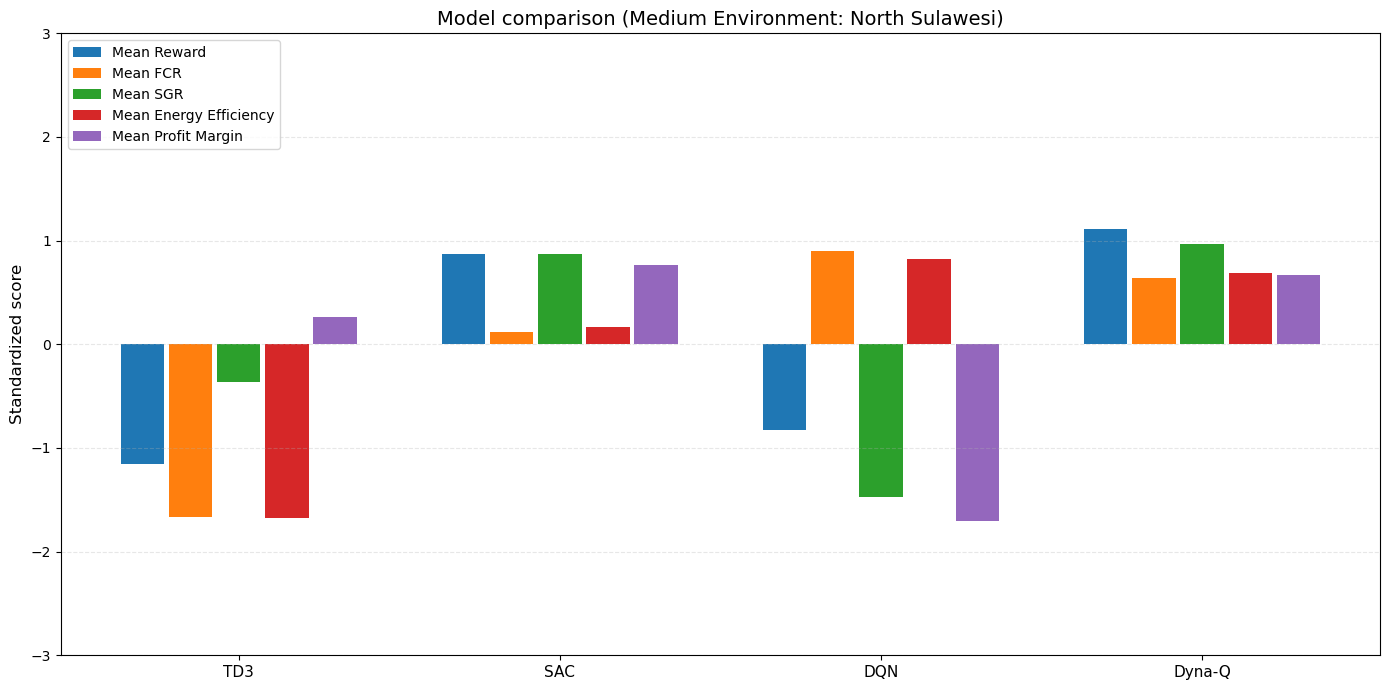

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Extract model names and metric values ---
models = list(metrics_by_model_medium.keys())
metrics = ['mean_reward', 'mean_fcr', 'mean_sgr', 'mean_profit_margin', 'mean_energy_efficiency']
labels = ['Mean Reward', 'Mean FCR', 'Mean SGR', 'Mean Energy Efficiency', 'Mean Profit Margin']

# Build a 2D list: one row per model, one column per metric
values = np.array([[metrics_by_model_medium[m][metric] for metric in metrics]
                  for m in models])

# --- 2. Standardize metrics (Z-score normalization) ---
means = values.mean(axis=0)
std_devs = values.std(axis=0)

# Avoid division by zero by setting very small std_dev values to 1
std_devs[std_devs == 0] = 1

standardized_values = (values - means) / std_devs
plot_vals = standardized_values  # use standardized values

# --- 3. Invert FCR (column 1) because lower is better ---
plot_vals[:, 1] = -plot_vals[:, 1]  # Invert FCR

# --- 4. Plot grouped bar chart with margins ---
fig, ax = plt.subplots(figsize=(14, 7))

# Set the width of a bar and the spacing between groups
width = 0.15
x = np.arange(len(models))  # positions for the groups

# Plot bars for each metric
for i, label in enumerate(labels):
    # Position bars within each group - center the group of bars
    offset = (i - len(metrics)/2 + 0.5) * width
    bars = ax.bar(x + offset, plot_vals[:, i], width * 0.9, label=label)

# --- 5. Labels, ticks, legend ---
ax.set_ylabel('Standardized score', fontsize=12)
ax.set_title('Model comparison (Medium Environment: North Sulawesi)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=11)
ax.set_ylim(-3, 3)  # Set y-axis limits for standardized values (typically within [-3, 3])
ax.legend(loc='upper left', fontsize=10)

# Add grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [67]:
import numpy as np
from utils.calculation import Calculation

metrics_by_model_hard = {}

for entry in models_hard:
    name  = entry["name"]
    agent = entry["model"]
    env   = entry["env"]

    reward_list = []
    fcr_list    = []
    sgr_list    = []
    pm_list     = []
    energy_efficiency_list = []  # To store energy efficiency values

    for run in range(EPISODE_PER_EVALUATION):
        obs, _ = env.reset()
        initial_biomass = env.prev_biomass

        terminated = False
        truncated  = False
        total_reward     = 0.0
        total_feed_grams = 0.0
        fish_values      = []
        total_costs      = []  # This will store dictionaries with individual costs

        if name == "Dyna-Q":
            state = agent.discretize_obs(obs)

        while not (terminated or truncated):
            if name == "Dyna-Q":
                idx    = np.argmax(agent.q_table[state])
                action = np.array(agent.action_space[idx], dtype=np.float32)
            else:
                action, _ = agent.predict(obs, deterministic=True)

            obs, reward, terminated, truncated, info = env.step(action)
            total_reward     += reward
            total_feed_grams += env.feed_today

            fish_values.append(info["fish_value"])

            # Store individual costs as dictionaries instead of scalar sums
            total_costs.append({
                "feed_cost": info["feed_cost"],
                "heat_cost": info["heat_cost"],
                "oxygenation_cost": info["oxygenation_cost"]
            })

            if name == "Dyna-Q":
                state = agent.discretize_obs(obs)

        # At the end of the episode, calculate final metrics
        final_biomass = env._compute_total_biomass()

        # Calculate metrics after episode ends
        fcr     = Calculation.compute_fcr(total_feed_grams, final_biomass, initial_biomass)
        sgr     = Calculation.compute_sgr(initial_biomass, final_biomass)
        
        # Calculate profit margin, passing the total costs (sum of individual components)
        pmargin = Calculation.compute_profit_margin(fish_values, [sum(cost.values()) for cost in total_costs])

        # Calculate Energy Efficiency after episode ends
        energy_efficiency = Calculation.compute_energy_efficiency(
            sum(fish_values),  # Use the total fish value gain for the episode
            sum([cost["heat_cost"] for cost in total_costs]),  # Total heat cost over the episode
            sum([cost["oxygenation_cost"] for cost in total_costs])  # Total oxygenation cost over the episode
        )

        reward_list.append(total_reward)
        if fcr     is not None: fcr_list.append(fcr)
        if sgr     is not None: sgr_list.append(sgr)
        if pmargin is not None: pm_list.append(pmargin)
        if energy_efficiency is not None: energy_efficiency_list.append(energy_efficiency)

    # Compute means after all runs for the model
    mean_reward = np.mean(reward_list)
    mean_fcr    = np.mean(fcr_list)
    mean_sgr    = np.mean(sgr_list)
    mean_pm     = np.mean(pm_list)
    mean_energy_efficiency = np.mean(energy_efficiency_list)

    metrics_by_model_hard[name] = {
        "mean_reward": mean_reward,
        "mean_fcr":    mean_fcr,
        "mean_sgr":    mean_sgr,
        "mean_energy_efficiency": mean_energy_efficiency,
        "mean_profit_margin": mean_pm,
    }

    # Print summary for each model
    print(f"\n--- Evaluation for {name} (hard: {env.region}) ---")
    print(f"Mean Total Reward:                {mean_reward:.2f}")
    print(f"Mean Feed Conversion Ratio (FCR): {mean_fcr:.2f}")
    print(f"Mean Specific Growth Rate (SGR):  {mean_sgr:.2f}%")
    print(f"Mean Energy Efficiency:           {mean_energy_efficiency:.2f}")
    print(f"Mean Profit Margin:               {mean_pm:.2f}%")



--- Evaluation for TD3 (hard: guangdong) ---
Mean Total Reward:                75.61
Mean Feed Conversion Ratio (FCR): 3.36
Mean Specific Growth Rate (SGR):  2.02%
Mean Energy Efficiency:           2.94
Mean Profit Margin:               21.18%

--- Evaluation for SAC (hard: guangdong) ---
Mean Total Reward:                145.59
Mean Feed Conversion Ratio (FCR): 2.81
Mean Specific Growth Rate (SGR):  2.16%
Mean Energy Efficiency:           3.27
Mean Profit Margin:               32.00%

--- Evaluation for DQN (hard: guangdong) ---
Mean Total Reward:                62.09
Mean Feed Conversion Ratio (FCR): 2.42
Mean Specific Growth Rate (SGR):  1.86%
Mean Energy Efficiency:           2.26
Mean Profit Margin:               23.36%

--- Evaluation for Dyna-Q (hard: guangdong) ---
Mean Total Reward:                130.53
Mean Feed Conversion Ratio (FCR): 2.69
Mean Specific Growth Rate (SGR):  2.11%
Mean Energy Efficiency:           3.01
Mean Profit Margin:               30.84%


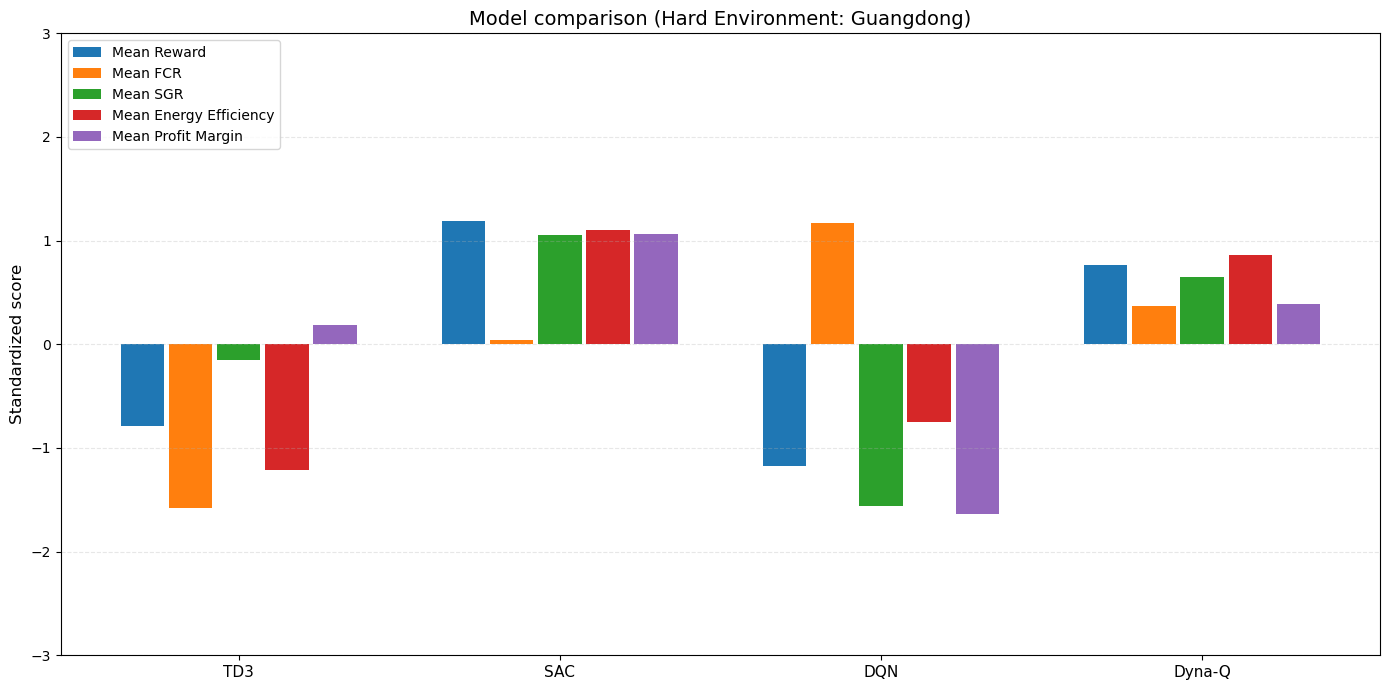

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Extract model names and metric values ---
models = list(metrics_by_model_hard.keys())
metrics = ['mean_reward', 'mean_fcr', 'mean_sgr', 'mean_profit_margin', 'mean_energy_efficiency']
labels = ['Mean Reward', 'Mean FCR', 'Mean SGR', 'Mean Energy Efficiency', 'Mean Profit Margin']

# Build a 2D list: one row per model, one column per metric
values = np.array([[metrics_by_model_hard[m][metric] for metric in metrics]
                  for m in models])

# --- 2. Standardize metrics (Z-score normalization) ---
means = values.mean(axis=0)
std_devs = values.std(axis=0)

# Avoid division by zero by setting very small std_dev values to 1
std_devs[std_devs == 0] = 1

standardized_values = (values - means) / std_devs
plot_vals = standardized_values  # use standardized values

# --- 3. Invert FCR (column 1) because lower is better ---
plot_vals[:, 1] = -plot_vals[:, 1]  # Invert FCR

# --- 4. Plot grouped bar chart with margins ---
fig, ax = plt.subplots(figsize=(14, 7))

# Set the width of a bar and the spacing between groups
width = 0.15
x = np.arange(len(models))  # positions for the groups

# Plot bars for each metric
for i, label in enumerate(labels):
    # Position bars within each group - center the group of bars
    offset = (i - len(metrics)/2 + 0.5) * width
    bars = ax.bar(x + offset, plot_vals[:, i], width * 0.9, label=label)

# --- 5. Labels, ticks, legend ---
ax.set_ylabel('Standardized score', fontsize=12)
ax.set_title('Model comparison (Hard Environment: Guangdong)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=11)
ax.set_ylim(-3, 3)  # Set y-axis limits for standardized values (typically within [-3, 3])
ax.legend(loc='upper left', fontsize=10)

# Add grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

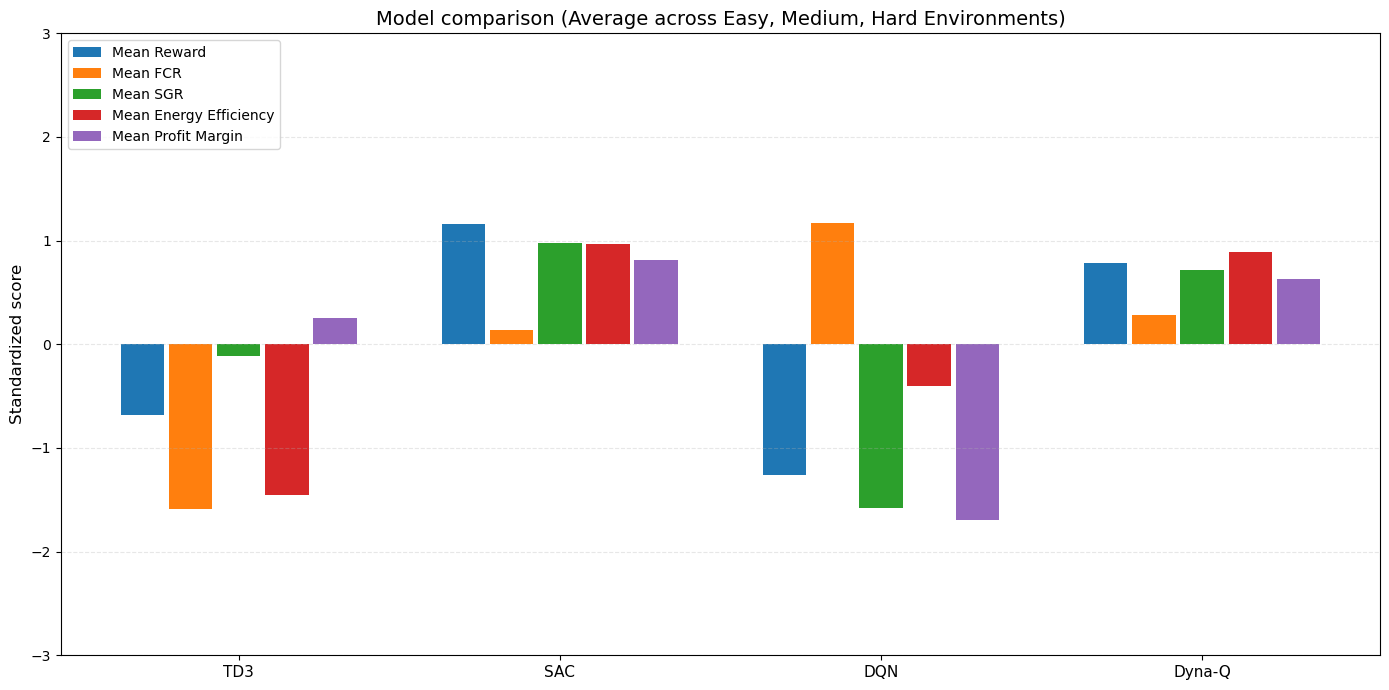

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Extract model names and metric values for each environment ---
metrics = ['mean_reward', 'mean_fcr', 'mean_sgr', 'mean_profit_margin', 'mean_energy_efficiency']
labels = ['Mean Reward', 'Mean FCR', 'Mean SGR', 'Mean Energy Efficiency', 'Mean Profit Margin']

# Extract the metrics for each environment
envs = ['easy', 'medium', 'hard']
# Assuming metrics_by_model_easy, metrics_by_model_medium, metrics_by_model_hard are defined elsewhere
metrics_by_model = {
    'easy': metrics_by_model_easy,
    'medium': metrics_by_model_medium,
    'hard': metrics_by_model_hard
}

# Prepare a 2D array to store the metric values across environments and models
model_names = list(metrics_by_model['easy'].keys())  # Assuming all environments have the same models
num_models = len(model_names)

# Prepare a 2D array for each metric, where each metric has values across all models and environments
values = {metric: np.zeros(num_models) for metric in metrics}

# Calculate the mean for each model across all environments
for model_idx, model in enumerate(model_names):
    for metric in metrics:
        # Take the mean of the metric value across all environments for each model
        metric_values = [metrics_by_model[env][model][metric] for env in envs if metric in metrics_by_model[env][model]]
        if metric_values:  # Check if we have any values (in case a metric is missing for some environments)
            values[metric][model_idx] = np.mean(metric_values)

# --- 2. Apply Z-score normalization for each metric ---
means = {metric: np.mean(values[metric]) for metric in metrics}
std_devs = {metric: np.std(values[metric]) for metric in metrics}

# Avoid division by zero by setting very small std_dev values to 1
for metric in metrics:
    if std_devs[metric] == 0:
        std_devs[metric] = 1

normalized_values = {metric: (values[metric] - means[metric]) / std_devs[metric] for metric in metrics}

# --- 3. Invert FCR (column 1) because lower is better ---
normalized_values['mean_fcr'] = -normalized_values['mean_fcr']  # Invert FCR

# --- 4. Plot grouped bar chart with margins ---
fig, ax = plt.subplots(figsize=(14, 7))

# Set the width of a bar and the spacing between groups
width = 0.15
x = np.arange(num_models)  # positions for the groups

# Plot bars for each metric
for i, metric in enumerate(metrics):
    # Position bars within each group - center the group of bars
    offset = (i - len(metrics)/2 + 0.5) * width
    bars = ax.bar(x + offset, normalized_values[metric], width * 0.9, label=labels[i])

# --- 5. Labels, ticks, legend ---
ax.set_ylabel('Standardized score', fontsize=12)
ax.set_title('Model comparison (Average across Easy, Medium, Hard Environments)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(model_names, fontsize=11)
ax.set_ylim(-3, 3)  # Set y-axis limits for standardized values (typically within [-3, 3])
ax.legend(loc='upper left', fontsize=10)

# Add grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

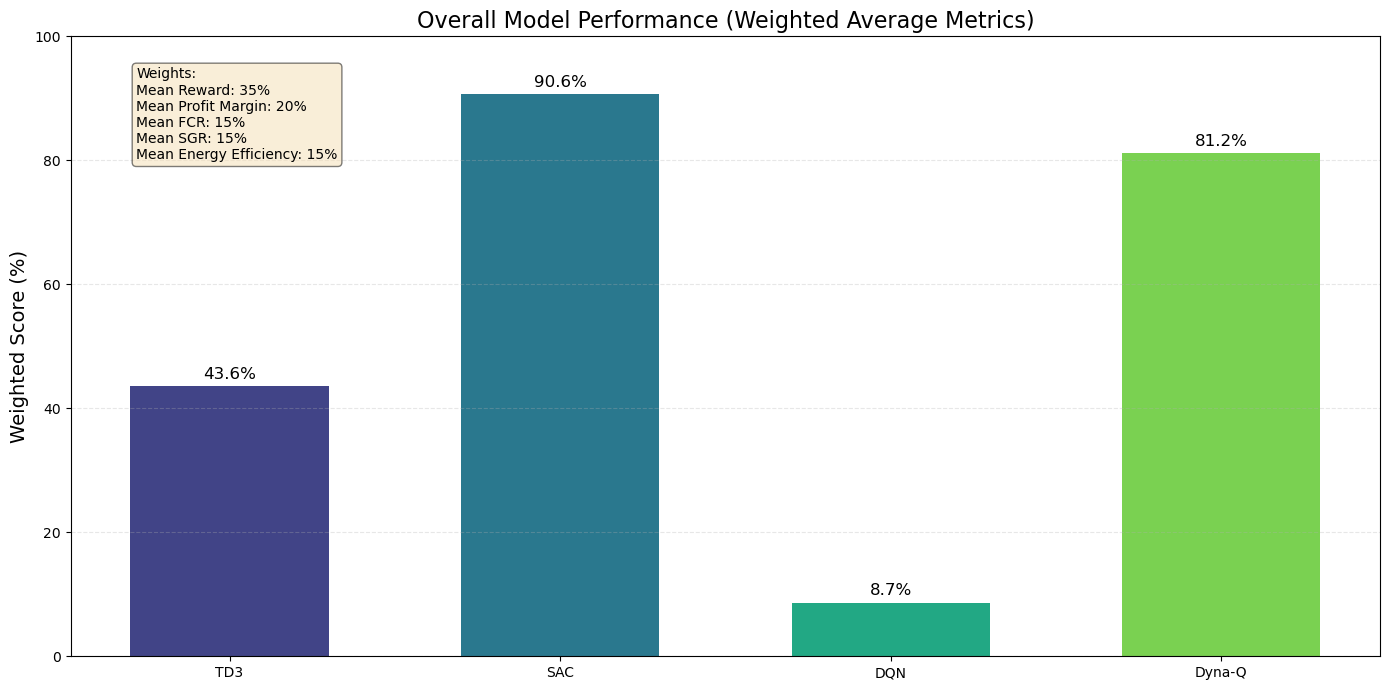

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Extract model names and metric values for each environment ---
metrics = ['mean_reward', 'mean_fcr', 'mean_sgr', 'mean_profit_margin', 'mean_energy_efficiency']
labels = ['Mean Reward', 'Mean FCR', 'Mean SGR', 'Mean Energy Efficiency', 'Mean Profit Margin']

# Extract the metrics for each environment
envs = ['easy', 'medium', 'hard']
# Assuming metrics_by_model_easy, metrics_by_model_medium, metrics_by_model_hard are defined elsewhere
metrics_by_model = {
    'easy': metrics_by_model_easy,
    'medium': metrics_by_model_medium,
    'hard': metrics_by_model_hard
}

# Prepare a 2D array to store the metric values across environments and models
model_names = list(metrics_by_model['easy'].keys())  # Assuming all environments have the same models
num_models = len(model_names)

# Prepare a 2D array for each metric, where each metric has values across all models and environments
values = {metric: np.zeros(num_models) for metric in metrics}

# Calculate the mean for each model across all environments
for model_idx, model in enumerate(model_names):
    for metric in metrics:
        # Take the mean of the metric value across all environments for each model
        metric_values = [metrics_by_model[env][model][metric] for env in envs if metric in metrics_by_model[env][model]]
        if metric_values:  # Check if we have any values (in case a metric is missing for some environments)
            values[metric][model_idx] = np.mean(metric_values)

# --- Normalize values for each metric ---
normalized_values = {}
for metric in metrics:
    min_val = np.min(values[metric])
    max_val = np.max(values[metric])
    # Handle case where min and max are equal (avoid division by zero)
    if max_val == min_val:
        normalized_values[metric] = np.ones_like(values[metric])
    else:
        normalized_values[metric] = (values[metric] - min_val) / (max_val - min_val)

# --- Calculate weighted average with specified weights ---
weights = {
    'mean_reward': 0.35,       # 35%
    'mean_fcr': 0.15,          # 15%
    'mean_sgr': 0.15,          # 15%
    'mean_profit_margin': 0.20, # 20%
    'mean_energy_efficiency': 0.15  # 15%
}

# Calculate the sum of weights to ensure they sum to 1.0
total_weight = sum(weights.values())

# Calculate weighted average for each model
weighted_scores = np.zeros(num_models)
for model_idx in range(num_models):
    score = 0
    for metric in metrics:
        score += normalized_values[metric][model_idx] * weights[metric]
    # Normalize by the sum of weights to ensure 0-100% scale
    weighted_scores[model_idx] = (score / total_weight) * 100

# --- Plot bar chart for final weighted scores ---
fig, ax = plt.subplots(figsize=(14, 7))

# Create a colormap for the bars
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(model_names)))

# Plot bars for weighted scores
bars = ax.bar(model_names, weighted_scores, color=colors, width=0.6)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12)

# --- Labels and formatting ---
ax.set_ylabel('Weighted Score (%)', fontsize=14)
ax.set_title('Overall Model Performance (Weighted Average Metrics)', fontsize=16)
ax.set_ylim(0, 100)  # Set y-axis limits to exactly 0-100%
ax.grid(axis='y', linestyle='--', alpha=0.3)

# Add a text box explaining the weights - corrected to match actual weights used
textstr = '\n'.join((
    'Weights:',
    'Mean Reward: 35%',
    'Mean Profit Margin: 20%',  # Updated to 20% to match the code
    'Mean FCR: 15%',
    'Mean SGR: 15%',
    'Mean Energy Efficiency: 15%'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()